### INVESTIGATING DRASTIC REDUCTION OF HONEYBEES POPULATION IN USA DUE TO THE EFFECT OF NEONIC PESTICIDES

In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.


------------------------------------------DATASET COLUMNS DETAILS-----------------------------------------------------------------------------------------------------

From USDA data

• numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year

• yieldpercol: Honey yield per colony. Unit is pounds

• totalprod: Total production (numcol x yieldpercol). Unit is pounds

• stocks: Refers to stocks held by producers. Unit is pounds

• priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.

• prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.

From USGS Data

• nCLOTHIANIDIN: The amount in kg of CLOTHIANIDIN applied

• nIMIDACLOPRID: The amount in kg of IMIDACLOPRID applied

• nTHIAMETHOXAM: The amount in kg of THIAMETHOXAM applied

• nACETAMIPRID: The amount in kg of ACETAMIPRID applied

• nTHIACLOPRID: The amount in kg of THIACLOPRID applied

• nAllNeonic: The amount in kg of all Neonics applied = (nCLOTHIANIDIN + nIMIDACLOPRID + nTHIAMETHOXAM + nACETAMIPRID + nTHIACLOPRID)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import os

In [2]:
os.listdir()

['Regression_project1.ipynb', '.ipynb_checkpoints', 'Honey_production_v01.csv']

Capture dataset in a dataframe:

In [3]:
honey_df=pd.read_csv('Honey_production_v01.csv')
honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


Obtain the mean production of honey year-wise:

In [4]:
totalprod=np.mean(honey_df.totalprod)
prod_per_year=honey_df.groupby('year').totalprod.mean().reset_index()
#print(f"Total honey production is {int(tot_prod)} pounds per year.")
prod_per_year.head()

,year,totalprod
0,1991,4.974614e+06
1,1992,5.007932e+06
2,1993,5.237364e+06
3,1994,4.931091e+06
4,1995,4.779045e+06


Obtain the year and production:

In [5]:
X=prod_per_year.year
y=prod_per_year.totalprod
print(type(X),type(y))
print(X.shape,y.shape)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
(27,) (27,)


Fit a regression model to the data above

In [6]:
regr=LinearRegression()
X=X.values.reshape(-1,1)
regr.fit(X,y)
print(regr.coef_[0],regr.intercept_)
print(X.shape,y.shape)

-53748.94606934727 112014440.5227562
(27, 1) (27,)


Create a list of production prediction basis the regression model

In [7]:
y_predict=regr.predict(X)

We fit line to the scatterplot.

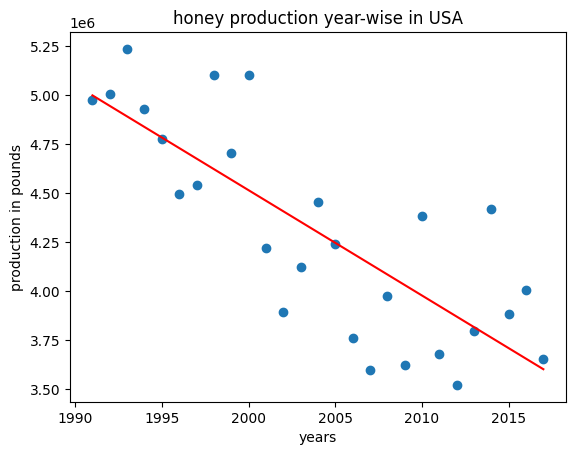

In [8]:
plt.plot(X,y_predict,color='r')
plt.scatter(X,y)
plt.title(f"honey production year-wise in USA")
plt.xlabel('years')
plt.ylabel('production in pounds')
plt.show()
plt.close()

Predict production for year 2050 starting at 2018.

In [9]:
X_future=np.array(range(2018,2051))
X_future=X_future.reshape(-1,1)
future_prod_predict=regr.predict(X_future)

Plot future production:

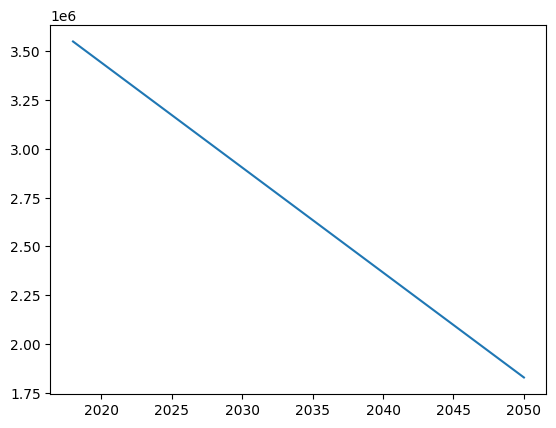

In [10]:
plt.plot(X_future,future_prod_predict)
plt.show()
plt.close()